# Advanced Regression - Assignment

## Importing the required libraries

In [1]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# To display all the columns
pd.options.display.max_columns = None

# To display all the rows
pd.options.display.max_rows = None

## Loading the data

In [3]:
# Loading the data
data = pd.read_csv('train.csv', low_memory=False)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
# Checking the shape of the dataframe
print(data.shape)

(1460, 81)


In [5]:
# Checking the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Checking for null values
print(data.isnull().sum())

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
# Percentage of null values
print(data.isnull().sum()/data.shape[0]*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

## Data Understanding and Cleaning

In [8]:
# Dropping the columns which have a high percentage of missing values
drop_list = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

data.drop(drop_list, axis=1, inplace=True)

In [9]:
# Checkiing the dataframe again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [10]:
# Checking the percentage of null values after dropping the columns
print(data.isnull().sum()/data.shape[0]*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [11]:
# Checking the rows which have greater than or equal to 10 null values
data[data.isnull().sum(axis=1) >= 10]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
39      40          90       RL         65.0     6040   Pave      Reg   
520    521         190       RL         60.0    10800   Pave      Reg   
533    534          20       RL         50.0     5000   Pave      Reg   
705    706         190       RM         70.0     5600   Pave      Reg   
1011  1012          90       RL         75.0     9825   Pave      Reg   
1179  1180          20       RL         77.0     8335   Pave      Reg   
1218  1219          50       RM         52.0     6240   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
39           Lvl    AllPub    Inside       Gtl      Edwards       Norm   
520          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
533          Low    AllPub    Inside       Mod      BrkSide       Norm   
705          Lvl    AllPub    Inside       Gtl       IDOTRR       Norm   
1011         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1179         Lvl    AllPub    Corner       Gtl      Edwards       Norm   
1218         Lvl    AllPub    Inside       Gtl      BrkSide       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
39         Norm   Duplex     1Story            4            5       1955   
520        Norm   2fmCon     2Story            4            7       1900   
533        Norm     1Fam     1Story            1            3       1946   
705        Norm   2fmCon     2Story            4            5       1930   
1011       Norm   Duplex     1Story            5            5       1965   
1179       Norm     1Fam     1Story            5            5       1954   
1218       Norm     1Fam     1.5Fin            4            5       1947   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
39            1955     Gable  CompShg     AsbShng     Plywood       None   
520           2000     Gable  CompShg     MetalSd     MetalSd       None   
533           1950     Gable  CompShg     VinylSd     VinylSd       None   
705           1950       Hip  CompShg     VinylSd     Wd Shng       None   
1011          1965       Hip  CompShg     AsphShn     AsphShn       None   
1179          1954     Gable  CompShg     Wd Sdng     Wd Sdng       None   
1218          1950     Gable  CompShg     AsbShng     AsbShng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
39           0.0        TA        TA      PConc      NaN      NaN   
520          0.0        TA        TA     BrkTil      NaN      NaN   
533          0.0        Fa        Fa       Slab      NaN      NaN   
705          0.0        Fa        Fa       Slab      NaN      NaN   
1011         0.0        TA        TA     CBlock      NaN      NaN   
1179         0.0        TA        TA       Slab      NaN      NaN   
1218         0.0        TA        TA       Slab      NaN      NaN   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
39            NaN          NaN           0          NaN           0   
520           NaN          NaN           0          NaN           0   
533           NaN          NaN           0          NaN           0   
705           NaN          NaN           0          NaN           0   
1011          NaN          NaN           0          NaN           0   
1179          NaN          NaN           0          NaN           0   
1218          NaN          NaN           0          NaN           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
39            0            0    GasA        TA          N      FuseP   
520           0            0    GasA        TA          N      FuseA   
533           0            0    GasA        Fa          N      FuseF   
705           0            0    GasA        Fa          N      SBrkr   
1011          0            0    GasA        TA          N      SBrkr   
1179          0            0    GasA        Gd          Y 

In [12]:
# Dropping the rows with atleast 10 missing values
data = data[~(data.isnull().sum(axis=1) >= 10)]

In [13]:
# Checking the percentage of null values after dropping the required rows
print(data.isnull().sum()/data.shape[0]*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.825189
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.550585
MasVnrArea        0.550585
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.064694
BsmtCond          2.064694
BsmtExposure      2.133517
BsmtFinType1      2.064694
BsmtFinSF1        0.000000
BsmtFinType2      2.133517
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [14]:
# Dropping the column Id as it is not required for analysis
data.drop('Id', axis=1, inplace=True)

### Imputing missing values

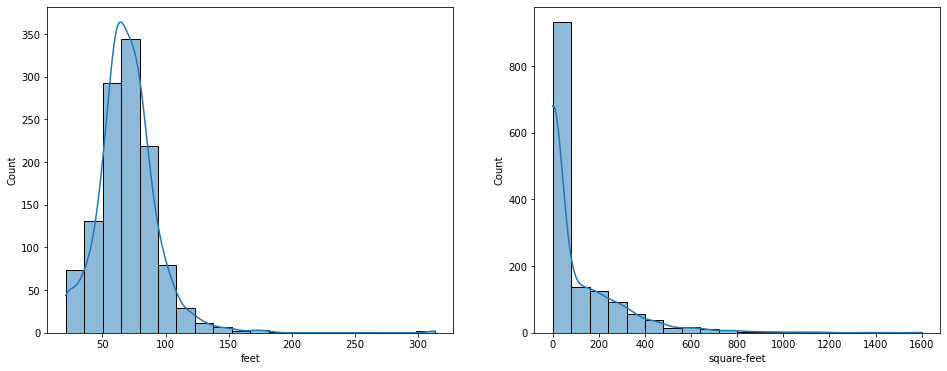

In [15]:
# Checking the distribution of LotFrontage and MasVnrArea

figure = plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['LotFrontage'], bins=20, kde=True)
plt.xlabel('feet')

plt.subplot(1, 2, 2)
sns.histplot(data['MasVnrArea'], bins=20, kde=True)
plt.xlabel('square-feet')

plt.show()

Since the distribution of the features is skewed, therefore, using median to impute the missing values.

In [16]:
data['LotFrontage'].fillna(data['LotFrontage'].median(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].median(), inplace=True)

Since the rest are categorical features, therefor using the mode to imput the missing values.

In [17]:
data['MasVnrType'].fillna(data['MasVnrType'].mode()[0], inplace=True)
data['BsmtQual'].fillna(data['BsmtQual'].mode()[0], inplace=True)
data['BsmtCond'].fillna(data['BsmtCond'].mode()[0], inplace=True)
data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0], inplace=True)
data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0], inplace=True)
data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0], inplace=True)
data['Electrical'].fillna(data['Electrical'].mode()[0], inplace=True)
data['GarageType'].fillna(data['GarageType'].mode()[0], inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mode()[0], inplace=True)
data['GarageFinish'].fillna(data['GarageFinish'].mode()[0], inplace=True)
data['GarageQual'].fillna(data['GarageQual'].mode()[0], inplace=True)
data['GarageCond'].fillna(data['GarageCond'].mode()[0], inplace=True)

In [18]:
# Checking to see if there are any more missing values
data.isnull().sum().sum()

0

### Derived Feature

Using the Remodel Year and the year sold, we can derive a new feature which can be treated as a rough age of the house.

In [19]:
data['HouseAge'] = data['YrSold'] - data['YearRemodAdd']

In [20]:
# Dropping the other date features
features = ['YearBuilt', 'YearRemodAdd', 'YrSold', 'MoSold']

data.drop(features, axis=1, inplace=True)

In [21]:
data.shape

(1453, 72)

In [22]:
# Calculating the correlation matrix of the input features with the target variable 'cnt'
correlation = data.drop('SalePrice', axis=1).corrwith(data['SalePrice'])
correlation = pd.DataFrame(correlation, columns=['Sale Price'])
print(correlation)

               Sale Price
MSSubClass      -0.080423
LotFrontage      0.334548
LotArea          0.262849
OverallQual      0.789839
OverallCond     -0.082656
MasVnrArea       0.471418
BsmtFinSF1       0.382883
BsmtFinSF2      -0.013212
BsmtUnfSF        0.208260
TotalBsmtSF      0.609823
1stFlrSF         0.605226
2ndFlrSF         0.319326
LowQualFinSF    -0.026457
GrLivArea        0.707695
BsmtFullBath     0.223358
BsmtHalfBath    -0.018407
FullBath         0.563754
HalfBath         0.280972
BedroomAbvGr     0.166185
KitchenAbvGr    -0.126036
TotRmsAbvGrd     0.533437
Fireplaces       0.465101
GarageYrBlt      0.406686
GarageCars       0.637090
GarageArea       0.619693
WoodDeckSF       0.322741
OpenPorchSF      0.314731
EnclosedPorch   -0.127490
3SsnPorch        0.044051
ScreenPorch      0.110258
PoolArea         0.092364
MiscVal         -0.014335
HouseAge        -0.505670


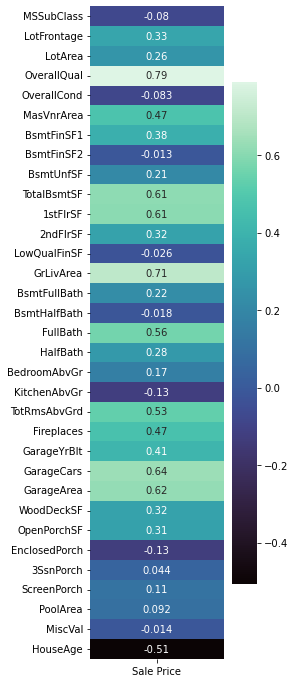

In [23]:
# Check correlation with target
figure = plt.figure(figsize=(3, 12))
sns.heatmap(correlation, annot=True, cmap='mako')
plt.show()

### Regression plots of the highly/moderately correlated features with the target

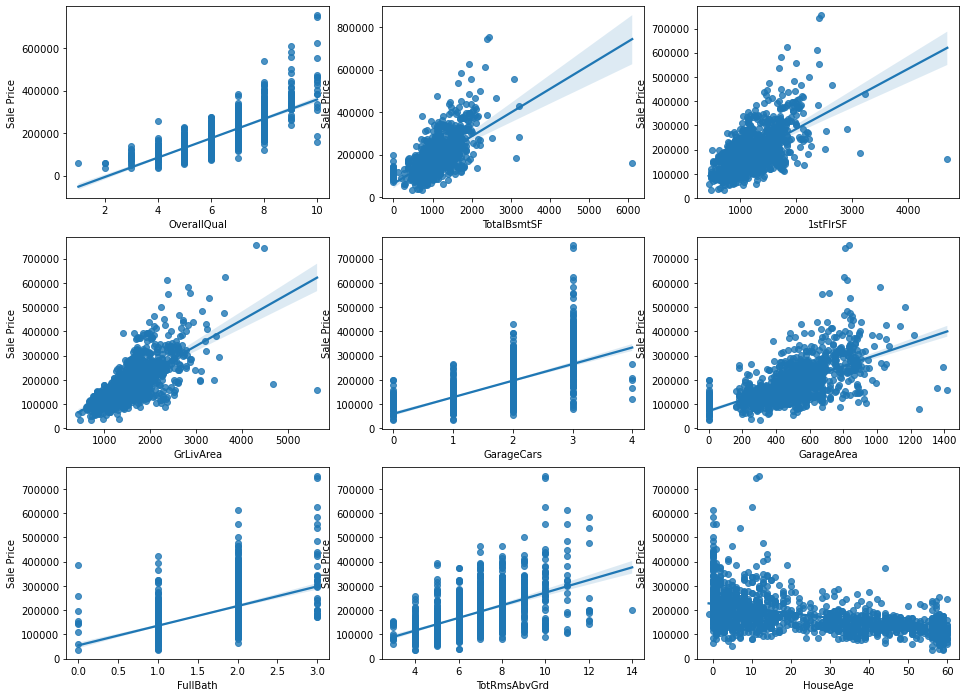

In [24]:
# Plotting regression plots of features with the highest correlation
figure = plt.figure(figsize=(16, 12))

plt.subplot(3, 3, 1)
sns.regplot(x='OverallQual', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.subplot(3, 3, 2)
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.subplot(3, 3, 3)
sns.regplot(x='1stFlrSF', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.subplot(3, 3, 4)
sns.regplot(x='GrLivArea', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.subplot(3, 3, 5)
sns.regplot(x='GarageCars', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.subplot(3, 3, 6)
sns.regplot(x='GarageArea', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.subplot(3, 3, 7)
sns.regplot(x='FullBath', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.subplot(3, 3, 8)
sns.regplot(x='TotRmsAbvGrd', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.subplot(3, 3, 9)
sns.regplot(x='HouseAge', y='SalePrice', data=data)
plt.ylabel('Sale Price')

plt.show()

As we can see that there exists a general linear relationship between the features and the target variable and hence, Linear Regression is a viable option.

### Boxplots of features to check for outliers

Text(0.5, 0, 'Garage farea in square feet')

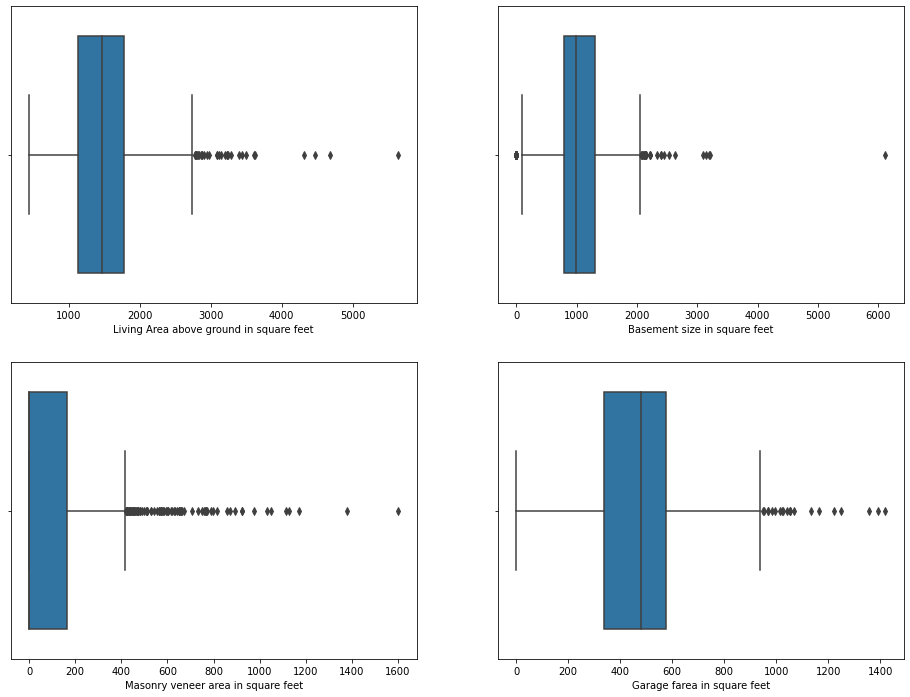

In [25]:
figure = plt.figure(figsize=(16, 12))

# boxplot for GrLivArea
plt.subplot(2, 2, 1)
sns.boxplot(data=data, x='GrLivArea')
plt.xlabel('Living Area above ground in square feet')

# boxplot for TotalBsmtSF
plt.subplot(2, 2, 2)
sns.boxplot(data=data, x='TotalBsmtSF')
plt.xlabel('Basement size in square feet')

# boxplot for MasVnrArea
plt.subplot(2, 2, 3)
sns.boxplot(data=data, x='MasVnrArea')
plt.xlabel('Masonry veneer area in square feet')

# boxplot for GarageArea
plt.subplot(2, 2, 4)
sns.boxplot(data=data, x='GarageArea')
plt.xlabel('Garage farea in square feet')

### Outlier Removal

As we can see that there are outliers in the features. We will use the inter-quartile range (IQR) method to treat these outliers.

In [26]:
# Required vars
req_vars = ['GrLivArea', 'TotalBsmtSF', 'MasVnrArea', 'GarageArea']

# Outlier removal
q3 = data[req_vars].quantile(0.75)
q1 = data[req_vars].quantile(0.25)
iqr = q3-q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr

data = data[(data['GrLivArea'] >= lower_lim['GrLivArea']) & (data['GrLivArea'] <= upper_lim['GrLivArea']) & 
            (data['TotalBsmtSF'] >= lower_lim['TotalBsmtSF']) & (data['TotalBsmtSF'] <= upper_lim['TotalBsmtSF']) & 
            (data['MasVnrArea'] >= lower_lim['MasVnrArea']) & (data['MasVnrArea'] <= upper_lim['MasVnrArea']) & 
            (data['GarageArea'] >= lower_lim['GarageArea']) & (data['GarageArea'] <= upper_lim['GarageArea'])]

In [27]:
data.shape

(1288, 72)

### Boxplots to visualize the variation of Sale Price across various categories

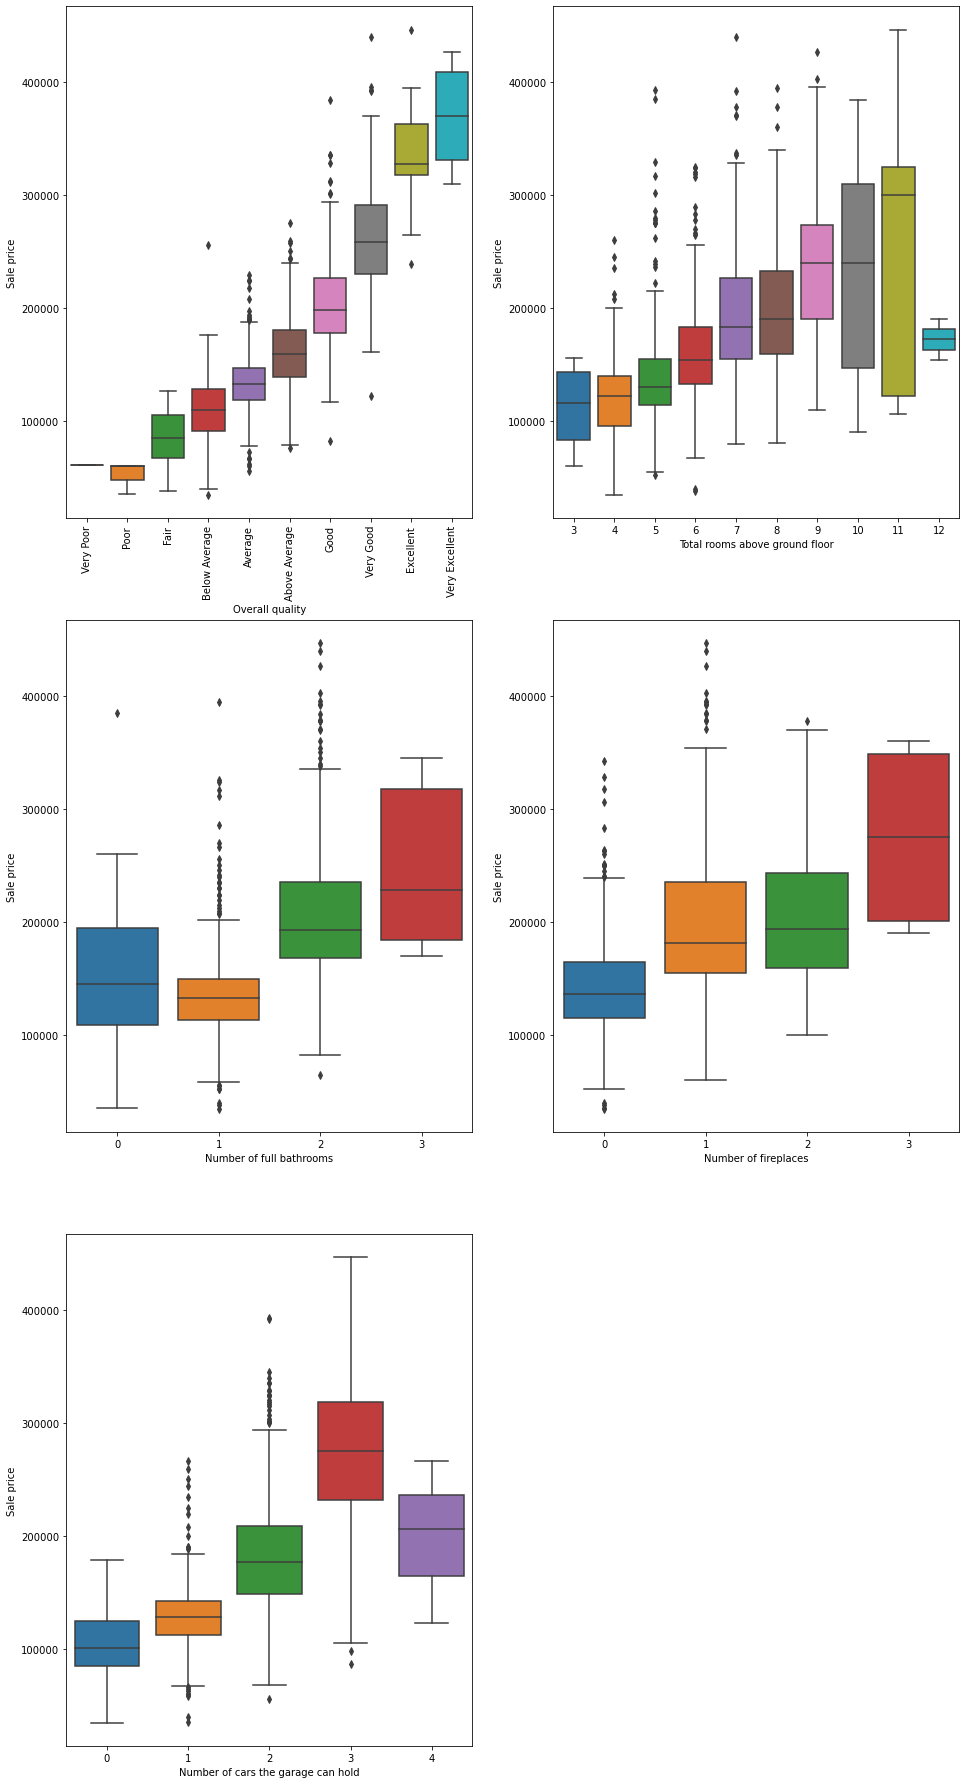

In [28]:
figure = plt.figure(figsize=(16, 32))

# boxplot for the sale price with increase in overall quality

oqt = [i for i in range(10)]
oq = ['Very Poor', 'Poor', 'Fair', 'Below Average', 'Average', 'Above Average',
      'Good', 'Very Good', 'Excellent', 'Very Excellent']
plt.subplot(3, 2, 1)
sns.boxplot(data=data, x='OverallQual', y='SalePrice')
plt.xlabel('Overall quality')
plt.ylabel('Sale price')
plt.xticks(ticks=oqt, labels=oq, rotation=90)

# boxplot for sale price with increase in number of rooms
plt.subplot(3, 2, 2)
sns.boxplot(data=data, x='TotRmsAbvGrd', y='SalePrice')
plt.xlabel('Total rooms above ground floor')
plt.ylabel('Sale price')

# boxplot for sale price with increase in number of full bathrooms
plt.subplot(3, 2, 3)
sns.boxplot(data=data, x='FullBath', y='SalePrice')
plt.xlabel('Number of full bathrooms')
plt.ylabel('Sale price')

# boxplot for sale price across different number of fireplaces
plt.subplot(3, 2, 4)
sns.boxplot(data=data, x='Fireplaces', y='SalePrice')
plt.xlabel('Number of fireplaces')
plt.ylabel('Sale price')

# boxplot for sale price across different garage sizes
plt.subplot(3, 2, 5)
sns.boxplot(data=data, x='GarageCars', y='SalePrice')
plt.xlabel('Number of cars the garage can hold')
plt.ylabel('Sale price')

plt.show()

As we can see, apart from a few anomalies, there is a general increasing trend with increase in the overall quality and the number of rooms, bathrooms and garage sizes.

### Checking the scatter plot of each feature with other features and the target variable

<Figure size 1440x1440 with 0 Axes>

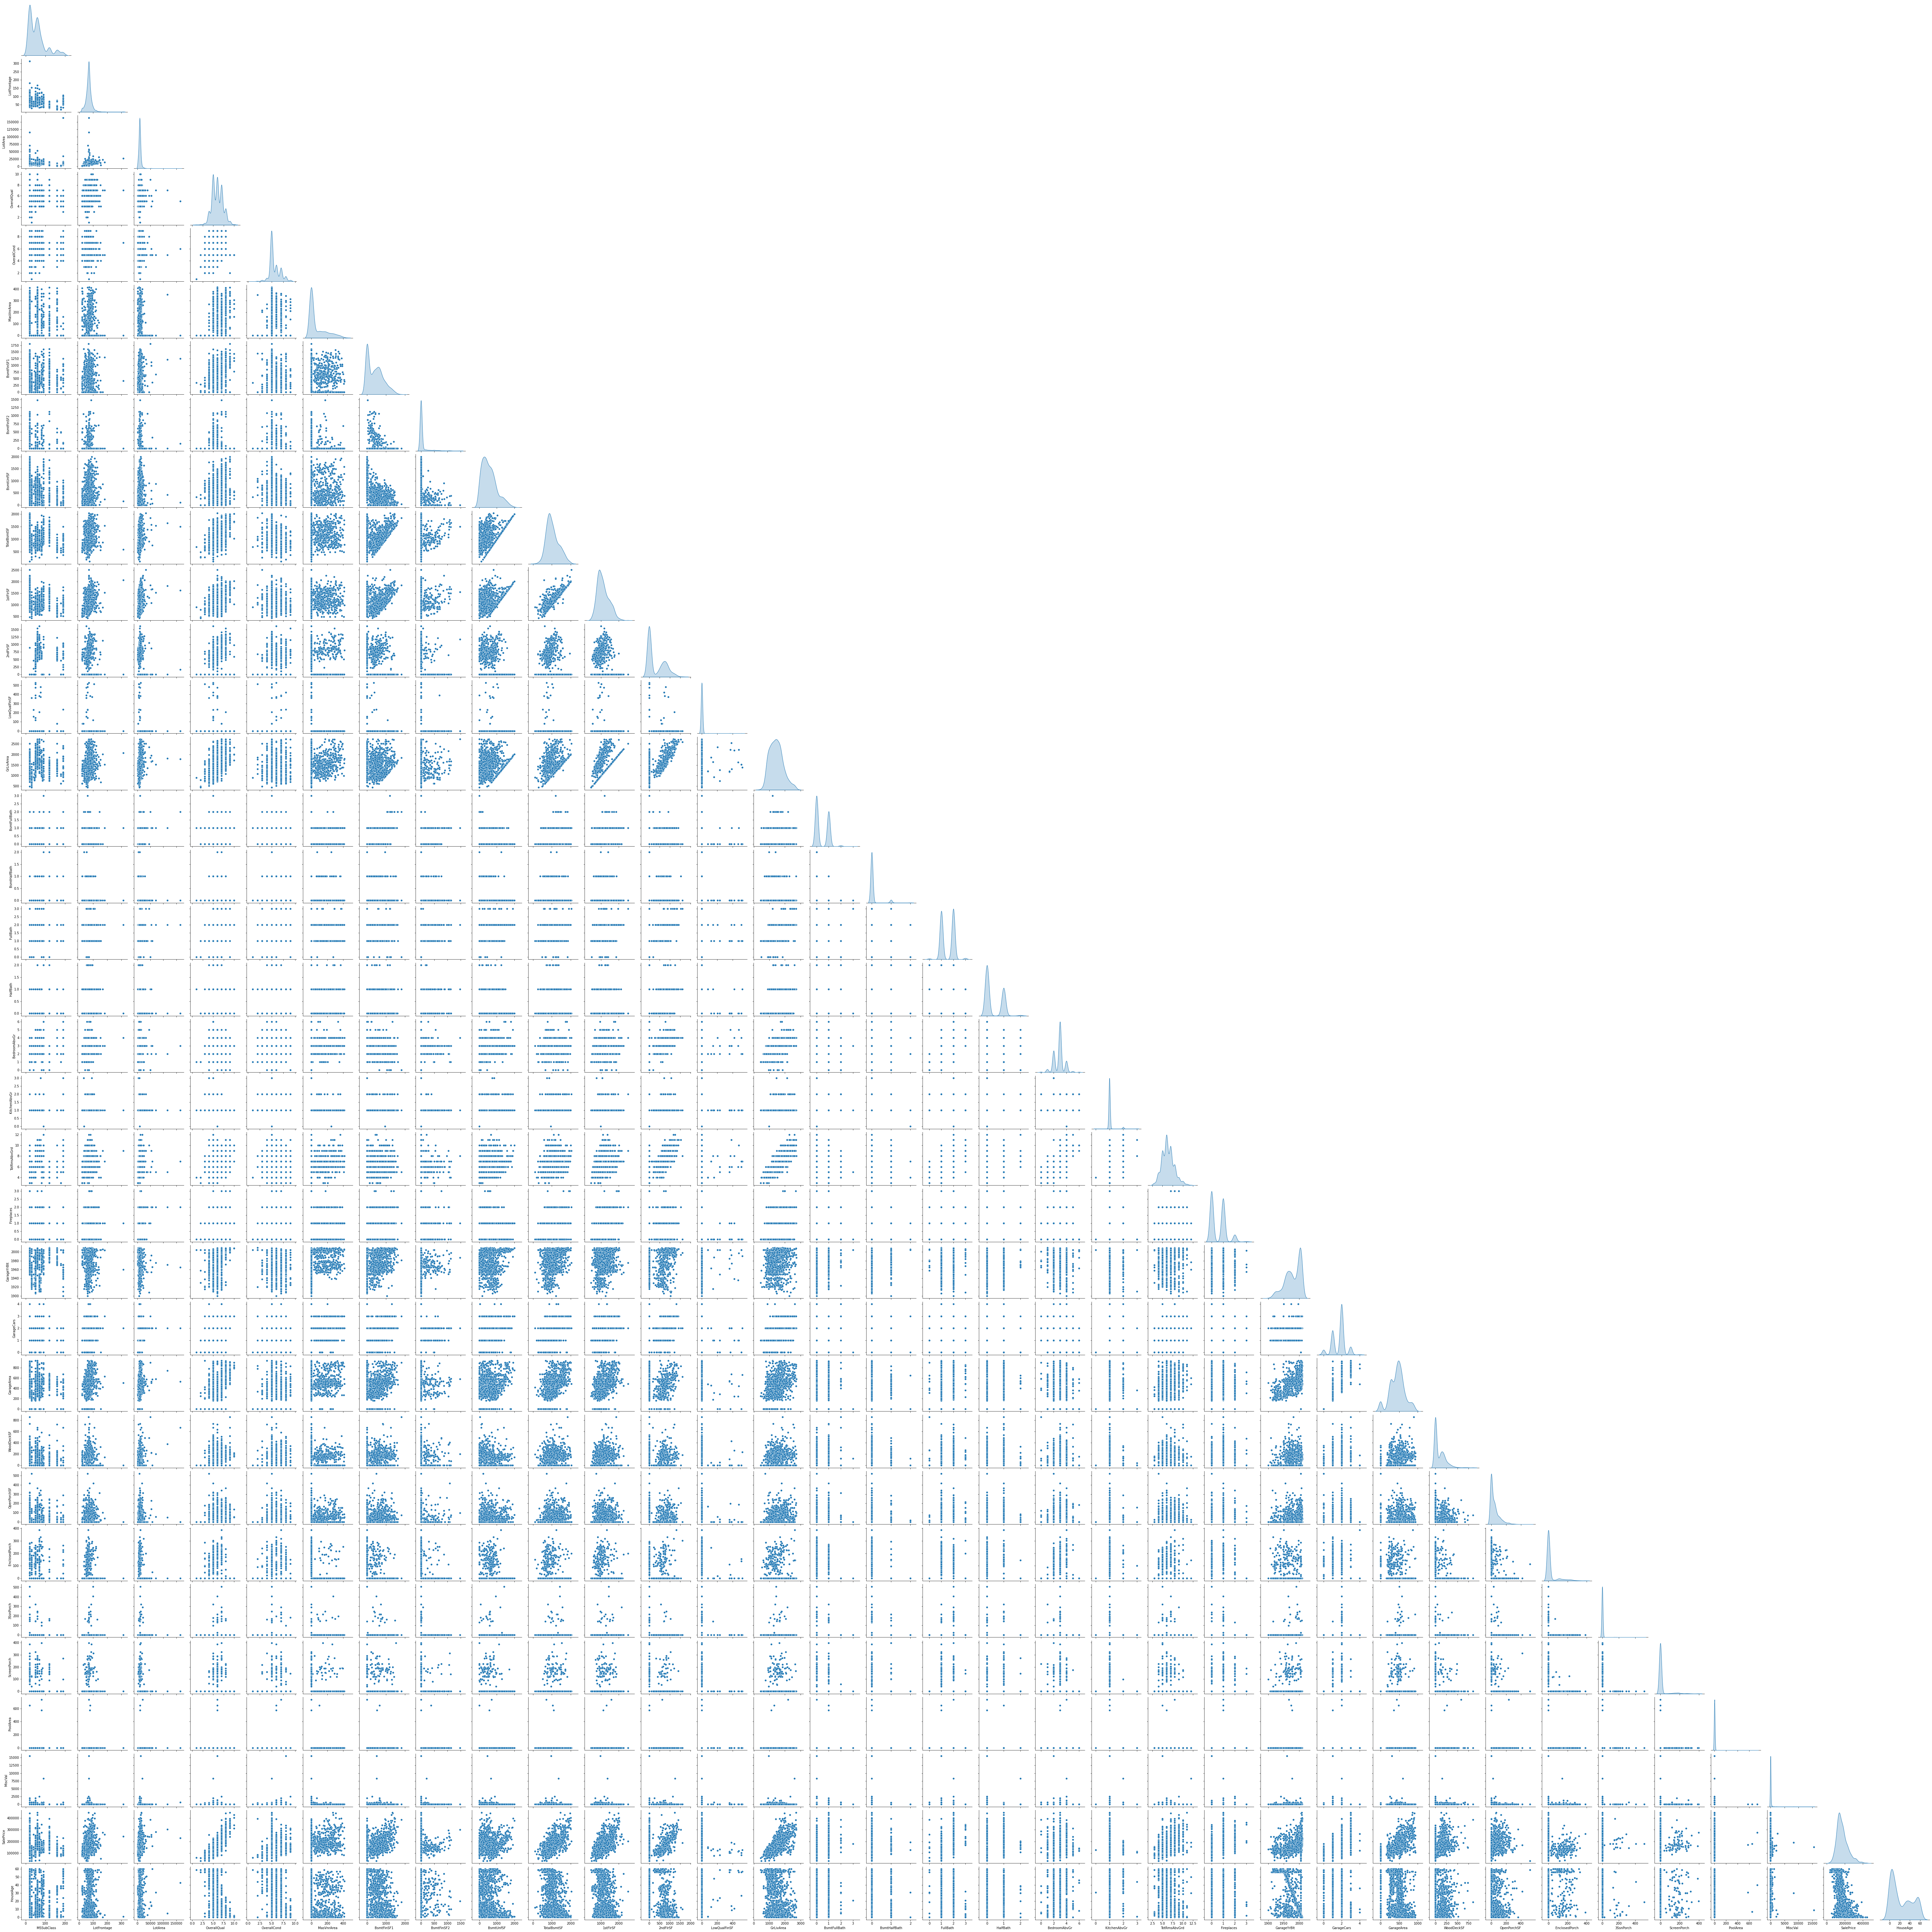

In [29]:
# Plotting pairplots of the features
figure = plt.figure(figsize=(20, 20))
sns.pairplot(data, diag_kind='kde', corner=True)
plt.show()

In [30]:
# Checking the descriptive stats of required variables
req_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
            '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
            'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
            'ScreenPorch', 'PoolArea', 'MiscVal']

data[req_vars].describe().transpose()

count         mean          std     min      25%     50%  \
LotFrontage    1288.0    68.590450    20.357999    21.0    60.00    69.5   
LotArea        1288.0  9956.338509  7313.992824  1300.0  7444.00  9242.5   
MasVnrArea     1288.0    66.842391   106.098527     0.0     0.00     0.0   
BsmtFinSF1     1288.0   424.998447   404.856263     0.0     0.00   383.5   
BsmtFinSF2     1288.0    47.916925   164.871187     0.0     0.00     0.0   
BsmtUnfSF      1288.0   561.878106   415.657390     0.0   241.75   485.0   
TotalBsmtSF    1288.0  1034.793478   333.919477   105.0   796.00   973.5   
1stFlrSF       1288.0  1116.877329   329.924741   438.0   864.00  1056.0   
2ndFlrSF       1288.0   326.024068   410.513699     0.0     0.00     0.0   
LowQualFinSF   1288.0     4.755435    42.587138     0.0     0.00     0.0   
GrLivArea      1288.0  1447.656832   432.935617   438.0  1113.75  1422.0   
GarageArea     1288.0   452.822981   195.561427     0.0   308.00   463.0   
WoodDeckSF     1288.0    91.341615   121.330182     0.0     0.00     0.0   
OpenPorchSF    1288.0    43.734472    61.956555     0.0     0.00    22.5   
EnclosedPorch  1288.0    23.136646    61.132703     0.0     0.00     0.0   
3SsnPorch      1288.0     3.358696    29.280710     0.0     0.00     0.0   
ScreenPorch    1288.0    13.416925    50.446638     0.0     0.00     0.0   
PoolArea       1288.0     1.523292    31.700513     0.0     0.00     0.0   
MiscVal        1288.0    39.894410   510.580121     0.0     0.00     0.0   

                    75%       max  
LotFrontage       76.00     313.0  
LotArea        11250.00  164660.0  
MasVnrArea       117.50     415.0  
BsmtFinSF1       690.50    1810.0  
BsmtFinSF2         0.00    1474.0  
BsmtUnfSF        796.25    2002.0  
TotalBsmtSF     1240.25    2035.0  
1stFlrSF        1328.00    2515.0  
2ndFlrSF         704.75    1611.0  
LowQualFinSF       0.00     528.0  
GrLivArea       1716.25    2730.0  
GarageArea       572.00     936.0  
WoodDeckSF       168.00     857.0  
OpenPorchSF       63.00     523.0  
EnclosedPorch      0.00     386.0  
3SsnPorch          0.00     508.0  
ScreenPorch        0.00     396.0  
PoolArea           0.00     738.0  
MiscVal            0.00   15500.0

### Converting the data of object data types

We have also observed that many features are of the object data type. We need to convert them to the correct type as can be used by the model.

Getting the dummy variables for the following features which have no ordinal significance:
- 'MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'CentralAir', 'RoofMatl', 'SaleType', 'SaleCondition'

In [31]:
# Get the dummy variables for the above features
# Setting the drop_first to True because we need only n-1 variables for n categories
dummy_features = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                  'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                  'RoofStyle', 'Exterior1st', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
                  'Neighborhood', 'Condition1', 'Exterior2nd', 'MasVnrType', 'Foundation',
                  'Heating', 'Electrical', 'GarageType', 'CentralAir', 'RoofMatl', 'SaleType',
                  'SaleCondition']

data = pd.get_dummies(data, columns=dummy_features, drop_first=True)

Encoding the remaining features which have ordinal significance:
- 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive'

In [32]:
# Encoding the above mentioned ordinal features
equal_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
econd_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
bqual_map = {'NA': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
bcond_map = {'NA': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
bexp_map = {'NA': 1, 'No': 2, 'Mn': 3, 'Av': 4, 'Gd': 5}
bft1_map = {'NA': 1, 'Unf': 2, 'LwQ': 3, 'Rec': 4, 'BLQ': 5, 'ALQ': 6, 'GLQ': 7}
bft2_map = {'NA': 1, 'Unf': 2, 'LwQ': 3, 'Rec': 4, 'BLQ': 5, 'ALQ': 6, 'GLQ': 7}
hqc_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
kqual_map = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
func_map = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}
gfin_map = {'NA': 1, 'Unf': 2, 'RFn': 3, 'Fin': 4}
gqual_map = {'NA': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
gcond_map = {'NA': 1, 'Po': 2, 'Fa': 3, 'TA': 4, 'Gd': 5, 'Ex': 6}
pdrive_map = {'N': 1, 'P': 2, 'Y': 3}

data['ExterQual'] = data['ExterQual'].map(equal_map)
data['ExterCond'] = data['ExterCond'].map(econd_map)
data['BsmtQual'] = data['BsmtQual'].map(bqual_map)
data['BsmtCond'] = data['BsmtCond'].map(bcond_map)
data['BsmtExposure'] = data['BsmtExposure'].map(bexp_map)
data['BsmtFinType1'] = data['BsmtFinType1'].map(bft1_map)
data['BsmtFinType2'] = data['BsmtFinType2'].map(bft2_map)
data['HeatingQC'] = data['HeatingQC'].map(hqc_map)
data['KitchenQual'] = data['KitchenQual'].map(kqual_map)
data['Functional'] = data['Functional'].map(func_map)
data['GarageFinish'] = data['GarageFinish'].map(gfin_map)
data['GarageQual'] = data['GarageQual'].map(gqual_map)
data['GarageCond'] = data['GarageCond'].map(gcond_map)
data['PavedDrive'] = data['PavedDrive'].map(pdrive_map)

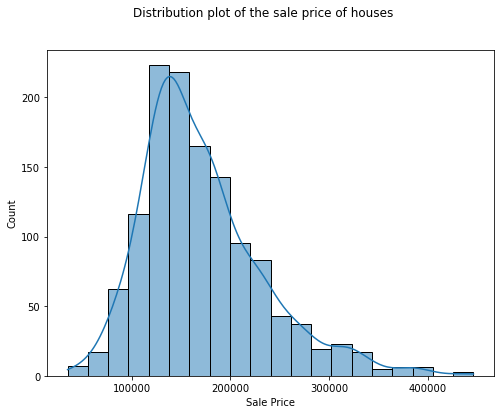

In [33]:
# Checking the distribution of the target
figure = plt.figure(figsize=(8, 6))
sns.histplot(data['SalePrice'], bins=20, kde=True)
figure.suptitle('Distribution plot of the sale price of houses', fontsize=12)

plt.xlabel('Sale Price')
plt.show()

We can see that the distribution of the target variable has normal distribution but is a little skewed.

## Data pre-processing

### Train-Test split

We need to split the data into the train and test sets for model training and evaluation.
We will use a 75-25 split for the data.

In [34]:
# Splitting the data into train and test sets
train_data, test_data = train_test_split(data, train_size=0.75, test_size=0.25, random_state=24)

### Scaling the features

Scaling the features should almost always be done as it has two main advantages:
- Helps the model converge faster on the minima
- Having the features in the same scale helps in interpreting the weights or coefficients properly

For our case, we will use min-max normalization because it is scaling technique which does not assume the data to have any specific distribution

In [35]:
# Instantiating a scaler object
scaler = MinMaxScaler()

# Apply the scaler to all the columns except the ones which have only 0s or 1s
scaled_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
              'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
              'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'OpenPorchSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
              'SalePrice', 'GrLivArea', 'HouseAge']

train_data[scaled_vars] = scaler.fit_transform(train_data[scaled_vars])
test_data[scaled_vars] = scaler.transform(test_data[scaled_vars])

### Separating the input and output feaures

In [36]:
# Separating the input features from the target feature for train and test sets
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

X_test = test_data.drop('SalePrice', axis=1)
y_test = test_data['SalePrice']

In [37]:
X_train.shape

(966, 237)

In [38]:
y_train.shape

(966,)

## Building the Model

### Lasso Regression

First we will create a model using L1 regularization (LASSO) and see its performance. Even though L1 regularisation inherently performs feature selection, we will perform some amount of automatic or manual feature elimination because of the large number of features.

Using grid search for tuning the hyperparameter alpha which controls the strength of regularisation

In [39]:
param_grid = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 
                        1, 5, 10, 50, 100, 500, 1000]}

base_lasso = Lasso()
grid_lasso = GridSearchCV(estimator=base_lasso,
                         param_grid=param_grid,
                         scoring='r2',
                         cv=5,
                         verbose=2)

In [40]:
grid_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.0s
[CV] END .......................................

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   50, 100, 500, 1000]},
             scoring='r2', verbose=2)

In [41]:
grid_lasso.best_estimator_

Lasso(alpha=0.001)

In [42]:
train_score = grid_lasso.best_score_
print(f"Coefficient of determination on train set: {train_score:.2f}")

Coefficient of determination on train set: 0.88


In [43]:
lasso_tuned = Lasso(alpha=0.001)
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [44]:
lasso_tuned.coef_

array([ 0.00000000e+00,  0.00000000e+00,  3.19654243e-02,  9.60494824e-03,
        0.00000000e+00,  1.76929932e-02, -0.00000000e+00,  1.87561300e-02,
       -0.00000000e+00,  1.15133921e-02,  1.62951553e-03,  5.72677087e-02,
        4.05500330e-04,  0.00000000e+00, -0.00000000e+00,  7.28504230e-02,
        1.69671214e-03,  1.10888504e-03,  0.00000000e+00, -0.00000000e+00,
        1.88606511e-01,  9.75398379e-03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -4.28215257e-03, -7.59550721e-03,  1.89545666e-02,
        8.90797961e-03,  8.27311834e-03,  1.90239464e-02,  1.60317782e-04,
        5.22052563e-03,  2.06587207e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.37412981e-03,  0.00000000e+00,  0.00000000e+00,
       -1.46884783e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  9.41985703e-03, -0.00000000e+00,
       -0.00000000e+00,  

In [45]:
bool = lasso_tuned.coef_ != 0

In [46]:
X_train.iloc[:, bool].columns

Index(['OverallQual', 'OverallCond', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'PavedDrive',
       'EnclosedPorch', 'MSSubClass_60', 'MSSubClass_120', 'MSZoning_RM',
       'LotShape_Reg', 'LandContour_Lvl', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Condition1_Norm', 'BldgType_TwnhsE',
       'HouseStyle_1Story', 'RoofStyle_Gable', 'Exterior1st_HdBoard',
       'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_Inside',
       'Neighborhood_Crawfor', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Condition1_Norm', 'SaleCondition_Partial'],
      dtype='object')

In [47]:
len(X_train.iloc[:, bool].columns)

47

As we can see, L1 regularisation has reduced the number of features to 47 from 237 because of its inherent capability for feature selection as it can reduce the coefficients to zero.

In [48]:
# Getting the top 5 features
coeffs = np.argsort(lasso_tuned.coef_)[-5:]

best_features = X_train.iloc[:, coeffs].columns
best_features

Index(['OverallQual', 'SaleCondition_Partial', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea'],
      dtype='object')

As we can see the best features are - OverallQual, SaleCondition_Partial, BsmtFinSF1, TotalBsmtSF and GrLivArea.

### Trying the tuned L1 regularised model on the test set

In [49]:
y_test_pred = lasso_tuned.predict(X_test)

### Checking the performance of the model on the test data

In [50]:
print('Test set scores:\n')

# The mean squared error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean squared error: {mse:.3f}")

# The root mean squared error
rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse:.2f}")

# The coefficient of determination
r2 = r2_score(y_test, y_test_pred)
print(f"Coefficient of determination: {r2:.2f}")

Test set scores:

Mean squared error: 0.003
Root mean squared error: 0.06
Coefficient of determination: 0.84


Now let us see the effect of doubling the hyperparameter alpha.

In [51]:
lasso_doubled = Lasso(alpha=0.002)
lasso_doubled.fit(X_train, y_train)

Lasso(alpha=0.002)

In [52]:
bool = lasso_doubled.coef_ != 0
len(X_train.iloc[:, bool].columns)

28

In [53]:
y_train_pred = lasso_doubled.predict(X_train)
y_test_pred = lasso_doubled.predict(X_test)

In [54]:
# The coefficient of determination
r2 = r2_score(y_train, y_train_pred)
print(f"Coefficient of determination - train: {r2:.2f}") 

r2 = r2_score(y_test, y_test_pred)
print(f"Coefficient of determination - test: {r2:.2f}")

Coefficient of determination - train: 0.86
Coefficient of determination - test: 0.81


In [55]:
# Getting the top 5 features after doubling the alpha value
coeffs = np.argsort(lasso_doubled.coef_)[-5:]

best_features = X_train.iloc[:, coeffs].columns
best_features

Index(['SaleCondition_Partial', 'TotalBsmtSF', 'BsmtFinSF1', 'OverallQual',
       'GrLivArea'],
      dtype='object')

As we can see, doubling the alpha caused:
- The model to become simpler because more coefficients were reduced to zero (47 to 28).
- The r-squared value decreases which is a result of the model becoming simpler.
- Also, the top 5 best features remain the same - SaleCondition_Partial, TotalBsmtSF, BsmtFinSF1, OverallQual and GrLivArea.

Now, dropping the original top 5 features and creating the model again to see the results.

In [80]:
to_drop = ['OverallQual', 'SaleCondition_Partial', 'BsmtFinSF1', 'TotalBsmtSF',
           'GrLivArea']
X_train_new = X_train.drop(to_drop, axis=1)

lasso_new = Lasso(alpha=0.001)
lasso_new.fit(X_train_new, y_train)

Lasso(alpha=0.001)

In [81]:
# Getting the top 5 features after removing the top 5 features
coeffs = np.argsort(lasso_new.coef_)[-5:]

best_features = X_train_new.iloc[:, coeffs].columns
best_features

Index(['SaleType_New', 'ExterQual', 'BsmtQual', '2ndFlrSF', '1stFlrSF'], dtype='object')

As we can see, the new top five features are SaleType_New, ExterQual, BsmtQual, 2ndFlrSF and 1stFlrSF.

### Ridge Regression

Now we will create a model using L2 regularization (Ridge) and see its performance. As, L2 regularisation does not inherently perform feature selection, therefore, we will perform some automatic or manual feature elimination.

In [58]:
# Instantiating a linear regression object
lr = Ridge()

# Fitting the model to the train data
lr.fit(X_train, y_train)

# Instantiating an RFE object with 40 best features specified
rfe = RFE(lr, n_features_to_select=40)
rfe = rfe.fit(X_train, y_train)

In [59]:
# checking the ranking of the features to find the 40 best features
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 97),
 ('MasVnrArea', False, 9),
 ('ExterQual', False, 46),
 ('ExterCond', False, 96),
 ('BsmtQual', False, 24),
 ('BsmtCond', False, 175),
 ('BsmtExposure', False, 68),
 ('BsmtFinType1', False, 178),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 190),
 ('BsmtFinSF2', False, 22),
 ('BsmtUnfSF', False, 125),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 173),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 65),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 111),
 ('BsmtHalfBath', False, 133),
 ('FullBath', False, 155),
 ('HalfBath', False, 137),
 ('BedroomAbvGr', False, 130),
 ('KitchenAbvGr', True, 1),
 ('KitchenQual', False, 27),
 ('TotRmsAbvGrd', False, 131),
 ('Functional', False, 33),
 ('Fireplaces', False, 76),
 ('GarageYrBlt', False, 195),
 ('GarageFinish', False, 183),
 ('GarageCars', False, 110),
 ('GarageArea', True, 1),
 ('GarageQual', False

In [60]:
# Taking only the best 18 features
req_cols = X_train.columns[rfe.support_]
req_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea',
       'WoodDeckSF', 'PoolArea', 'HouseAge', 'MSSubClass_160', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_RRNn', 'Condition2_Feedr', 'BldgType_Duplex',
       'HouseStyle_2.5Fin', 'Exterior1st_BrkComm', 'Neighborhood_Crawfor',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Foundation_Wood', 'Heating_OthW', 'RoofMatl_Membran',
       'RoofMatl_WdShngl', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_Oth',
       'SaleCondition_Alloca', 'SaleCondition_Partial'],
      dtype='object')

In [61]:
# Taking the train data for only the best 18 features
X_train_rfe = X_train[req_cols]
X_train_rfe.head()

LotFrontage   LotArea  OverallQual  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
805      0.239726  0.096391            7    0.000000     0.690163  0.559638   
611      0.166096  0.079887            6    0.334254     0.487638  0.335783   
924      0.198630  0.078525            6    0.345304     0.831668  0.705483   
129      0.164384  0.067396            5    0.313260     0.475013  0.347654   
1254     0.133562  0.049460            7    0.000000     0.337191  0.182024   

      2ndFlrSF  GrLivArea  KitchenAbvGr  GarageArea  WoodDeckSF  PoolArea  \
805   0.000000   0.431937             1    0.591880    0.000000       0.0   
611   0.000000   0.259162             1    0.602564    0.000000       0.0   
924   0.000000   0.544503             1    0.653846    0.448075       0.0   
129   0.000000   0.268325             1    0.801282    0.000000       0.0   
1254  0.581818   0.531414             1    0.424145    0.207701       0.0   

      HouseAge  MSSubClass_160  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
805   0.000000               0            0            0            1   
611   0.483333               0            0            0            1   
924   0.433333               0            0            0            1   
129   0.250000               0            0            0            1   
1254  0.066667               0            0            0            1   

      MSZoning_RM  Neighborhood_Crawfor  Neighborhood_Crawfor  \
805             0                     0                     0   
611             0                     0                     0   
924             0                     0                     0   
129             0                     0                     0   
1254            0                     0                     0   

      Neighborhood_NridgHt  Neighborhood_NridgHt  Neighborhood_Somerst  \
805                      0                     0                     1   
611                      0                     0                     0   
924                      0                     0                     0   
129                      0                     0                     0   
1254                     0                     0                     0   

      Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_StoneBr  \
805                      1                     0                     0   
611                      0                     0                     0   
924                      0                     0                     0   
129                      0                     0                     0   
1254                     0                     0                     0   

      Condition1_RRNn  Condition1_RRNn  Condition2_Feedr  BldgType_Duplex  \
805                 0                0                 0                0   
611                 0                0                 0                0   
924                 0                0                 0                0   
129                 0                0                 0                0   
1254                0                0                 0                0   

      HouseStyle_2.5Fin  Exterior1st_BrkComm  Neighborhood_Crawfor  \
805                   0                    0                     0   
611                   0                    0                     0   
924                   0                    0                     0   
129                   0                    0                     0   
1254                  0                    0                     0   

      Neighborhood_Crawfor  Neighborhood_NridgHt  Neighborhood_NridgHt  \
805                      0                     0                     0   
611                      0                     0                     0   
924                      0                     0                     0   
129                      0                     0                     0   
1254                     0                     0                     0   

      Neighborhood_

Using grid search for tuning the hyperparameter alpha which controls the strength of regularisation

In [62]:
param_grid = {'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 
                        1, 5, 10, 50, 100, 500, 1000]}

base_ridge = Ridge()
grid_ridge = GridSearchCV(estimator=base_ridge,
                         param_grid=param_grid,
                         scoring='r2',
                         cv=10,
                         verbose=2)

In [63]:
grid_ridge.fit(X_train_rfe, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.001; total time=   0.0s
[CV] END ........................................alpha=0.005; total time=   0.0s
[CV] END .....................................

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10,
                                   50, 100, 500, 1000]},
             scoring='r2', verbose=2)

In [64]:
grid_ridge.best_estimator_

Ridge(alpha=0.5)

In [65]:
train_score = grid_ridge.best_score_
print(f"Coefficient of determination on train set: {train_score:.2f}")

Coefficient of determination on train set: 0.88


In [66]:
ridge_tuned = Ridge(alpha=0.5)
ridge_tuned.fit(X_train_rfe, y_train)

Ridge(alpha=0.5)

In [67]:
ridge_tuned.coef_

array([ 0.09007154,  0.14803952,  0.03298673,  0.10800419,  0.1519218 ,
        0.06807597,  0.11349135,  0.12727426, -0.04954812,  0.06278998,
        0.05024806,  0.06756772, -0.05884237, -0.04421407,  0.05340699,
        0.04397924,  0.05409638,  0.04200294,  0.02072521,  0.02072521,
        0.01673874,  0.01673874,  0.01951872,  0.01951872,  0.01792676,
        0.01792676,  0.02544022,  0.02544022, -0.04869839, -0.03253776,
       -0.04254137, -0.10657258,  0.02072521,  0.02072521,  0.01673874,
        0.01673874,  0.01792676,  0.01792676,  0.0247189 ,  0.0247189 ,
       -0.07892339, -0.0582975 ,  0.05818152,  0.04830487,  0.05683851,
       -0.04640567,  0.04977452,  0.04473801,  0.05804044])

In [68]:
# Getting the top 5 features
coeffs = np.argsort(ridge_tuned.coef_)[-5:]

best_features = X_train_rfe.iloc[:, coeffs].columns
best_features

Index(['BsmtFinSF1', '2ndFlrSF', 'GrLivArea', 'LotArea', 'TotalBsmtSF'], dtype='object')

As we can see that the top 5 features we get with L2 regularised model having 40 features are 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'LotArea' and 'ExterQual'.

### Trying the tuned L2 regularised model on the test sets

In [69]:
X_test_rfe = X_test[req_cols]
X_test_rfe.head()

LotFrontage   LotArea  OverallQual  BsmtFinSF1  TotalBsmtSF  1stFlrSF  \
1074     0.181507  0.063734            7    0.000000     0.597054  0.453363   
988      0.166096  0.094388            6    0.086188     0.390847  0.384398   
727      0.147260  0.052824            7    0.400000     0.592846  0.448841   
227      0.000000  0.004998            6    0.177348     0.198843  0.025438   
937      0.184932  0.073562            7    0.188398     0.530247  0.381572   

      2ndFlrSF  GrLivArea  KitchenAbvGr  GarageArea  WoodDeckSF  PoolArea  \
1074  0.000000   0.349913             1    0.882479    0.163361       0.0   
988   0.592208   0.694590             1    0.588675    0.000000       0.0   
727   0.000000   0.346422             1    0.675214    0.154026       0.0   
227   0.327273   0.239529             1    0.299145    0.000000       0.0   
937   0.557143   0.668848             1    0.736111    0.000000       0.0   

      HouseAge  MSSubClass_160  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1074  0.016667               0            0            0            1   
988   0.516667               0            0            0            1   
727   0.033333               0            0            0            1   
227   0.633333               1            0            0            0   
937   0.066667               0            0            0            1   

      MSZoning_RM  Neighborhood_Crawfor  Neighborhood_Crawfor  \
1074            0                     0                     0   
988             0                     0                     0   
727             0                     0                     0   
227             1                     0                     0   
937             0                     0                     0   

      Neighborhood_NridgHt  Neighborhood_NridgHt  Neighborhood_Somerst  \
1074                     0                     0                     0   
988                      0                     0                     0   
727                      0                     0                     0   
227                      0                     0                     0   
937                      0                     0                     1   

      Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_StoneBr  \
1074                     0                     0                     0   
988                      0                     0                     0   
727                      0                     0                     0   
227                      0                     0                     0   
937                      1                     0                     0   

      Condition1_RRNn  Condition1_RRNn  Condition2_Feedr  BldgType_Duplex  \
1074                0                0                 0                0   
988                 0                0                 0                0   
727                 0                0                 0                0   
227                 0                0                 0                0   
937                 0                0                 0                0   

      HouseStyle_2.5Fin  Exterior1st_BrkComm  Neighborhood_Crawfor  \
1074                  0                    0                     0   
988                   0                    0                     0   
727                   0                    0                     0   
227                   0                    0                     0   
937                   0                    0                     0   

      Neighborhood_Crawfor  Neighborhood_NridgHt  Neighborhood_NridgHt  \
1074                     0                     0                     0   
988                      0                     0                     0   
727                      0                     0                     0   
227                      0                     0                     0   
937                      0                     0                     0   

      Neighborhood_

In [70]:
y_test_pred = ridge_tuned.predict(X_test_rfe)

### Checking the performance of the model on the test data

In [71]:
print('Test set scores:\n')

# The mean squared error
mse = mean_squared_error(y_test, y_test_pred)
print(f"Mean squared error: {mse:.3f}")

# The root mean squared error
rmse = np.sqrt(mse)
print(f"Root mean squared error: {rmse:.2f}")

# The coefficient of determination
r2 = r2_score(y_test, y_test_pred)
print(f"Coefficient of determination: {r2:.2f}")

Test set scores:

Mean squared error: 0.004
Root mean squared error: 0.06
Coefficient of determination: 0.80


Now checking the effect of doubling the hyperparameter alpha on the model performance

In [72]:
ridge_doubled = Ridge(alpha=1)
ridge_doubled.fit(X_train_rfe, y_train)

Ridge(alpha=1)

In [73]:
# Getting the top 5 features
coeffs = np.argsort(ridge_doubled.coef_)[-5:]

best_features = X_train_rfe.iloc[:, coeffs].columns
best_features

Index(['BsmtFinSF1', '2ndFlrSF', 'GrLivArea', 'LotArea', 'TotalBsmtSF'], dtype='object')

As we can see, that the top 5 features remain unchanged. This could be because L2 regularisation does not eliminate features unlike L1 regularisation.

Checking the effect on model performance.

In [74]:
y_train_pred = ridge_doubled.predict(X_train_rfe)
y_test_pred = ridge_doubled.predict(X_test_rfe)

In [75]:
# The coefficient of determination
r2 = r2_score(y_train, y_train_pred)
print(f"Coefficient of determination - train: {r2:.2f}") 

r2 = r2_score(y_test, y_test_pred)
print(f"Coefficient of determination - test: {r2:.2f}")

Coefficient of determination - train: 0.90
Coefficient of determination - test: 0.80


Thus, we can see the effect of doubling the alpha value in Ridge regression.

We can see from the evaluation metrics that our models seem to be performing pretty good on the train as well as the test data. With more data, or more statistically significant features, the performance can be further improved.

## Residual Analysis

Now we have to validate the assumptions of Multiple Linear Regression. The following assumptions need to be validated:
- Linear relationship between X and y: Plot scatter/regression plots to check if any linear relationship is apparent.
- The residuals are normally distributed and have approximately 0 mean: Plot a histogram of the error terms.
- The error terms are independent and random: Plot a scatterplot of residuals vs y_true values
- Homoscedasticity i.e., error terms have constant variance: Plot a scatterplot of error terms/residuals vs the predicted y values (y_pred).

The linear relationship between X and y was validated in the pair-wise scatterplots during the EDA phase.
So, the remaining three assumptions need to be validated.

In [76]:
# Running the model on the train set to get y_train
y_train_pred = ridge_tuned.predict(X_train_rfe)

# Calculating the residuals
residual = y_train - y_train_pred

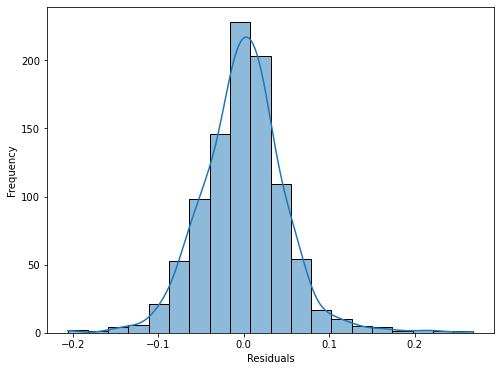

In [77]:
# Plotting a histogram of the residuals
figure = plt.figure(figsize = (8, 6))
sns.histplot(residual, kde=True, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

As had been assumed, the error terms have a normal distribution and have a mean of approximately zero.

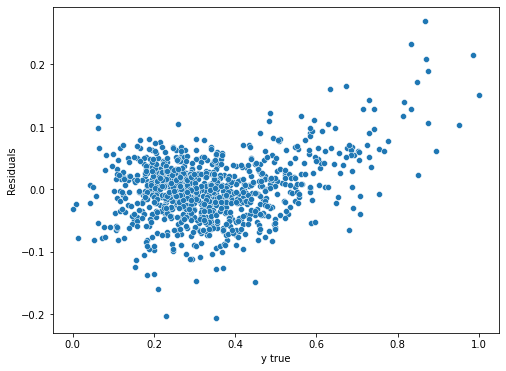

In [78]:
# Plotting a scatterplot of the residuals vs y_true values
figure = plt.figure(figsize = (8, 6))
sns.scatterplot(x=y_train, y=residual)
plt.xlabel('y true')
plt.ylabel('Residuals')
plt.show()

As had been assumed, the error terms have appear random and independent of each other.

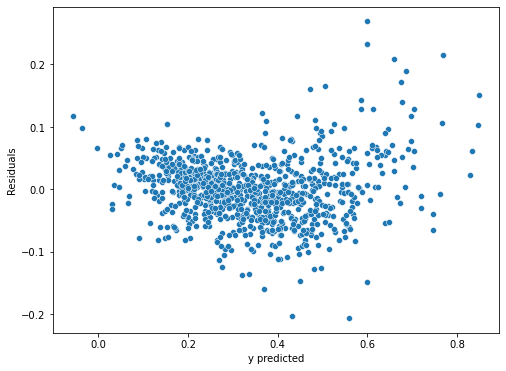

In [79]:
# Plotting a scatterplot of the residuals vs y_train_pred values
figure = plt.figure(figsize = (8, 6))
sns.scatterplot(x=y_train_pred, y=residual)
plt.xlabel('y predicted')
plt.ylabel('Residuals')
plt.show()

As had been assumed, the error terms almost have a constant variance throughout, except for a few data points.

So our assumptions for Linear Regression were correct and have been validated in the above graphs.